<a href="https://colab.research.google.com/github/Niktain-america/Project-Portfolio/blob/main/Ukraine_Russian_war_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ukraine Russia War Twitter Sentiment Analysis using Python:

Import necessary libraries:

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [4]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/filename.csv")
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1628557434615742464,1628557434615742464,2023-02-23 00:48:44 UTC,2023-02-23,00:48:44,0,1575192262467895298,asstsecenr,Assistant Secretary Geoffrey Pyatt,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1628557428403970048,1627834811178950656,2023-02-23 00:48:42 UTC,2023-02-23,00:48:42,0,3076716646,og_obi_wan,British Bro Ken,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'GeneralLmao', 'name': 'Gener...",NaN,NaN,NaN,NaN
2,1628557427280084992,1628556620526387202,2023-02-23 00:48:42 UTC,2023-02-23,00:48:42,0,830538315413663744,geraltka,Gerald - Russia:Go f*ck youself🇺🇸🇩🇪🇪🇺,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Reuters', 'name': 'Reuters',...",NaN,NaN,NaN,NaN
3,1628557423815323651,1628498646277693440,2023-02-23 00:48:41 UTC,2023-02-23,00:48:41,0,1131874772,koenig_jakob,Alex Wright 🇺🇦🏴󠁧󠁢󠁥󠁮󠁧󠁿,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'reshetz', 'name': 'Mira of K...",NaN,NaN,NaN,NaN
4,1628557422489993216,1628557422489993216,2023-02-23 00:48:41 UTC,2023-02-23,00:48:41,0,1591840761296871424,usaacey,Acey,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


Let’s have a quick look at all the column names of the dataset:

In [5]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

We only need three columns for this task (username, tweet, and language); I will only select these columns and move forward:

In [6]:
data=data[["username", "tweet", "language"]]

Let’s have a look at whether any of these columns contains any null values or not:

In [7]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

So none of the columns has null values, let’s have a quick look at how many tweets are posted in which language:

In [9]:
data["language"].value_counts()

en     8723
pt      522
it      241
qme     117
in       95
und      52
ja       41
ca       37
es       31
ru       29
qam      14
de       11
fr       10
nl        9
fi        6
pl        5
et        5
ar        5
zh        5
ro        4
cs        4
hi        4
qht       4
ko        4
zxx       4
tl        3
vi        3
uk        3
ht        2
tr        2
sr        1
th        1
da        1
cy        1
fa        1
ta        1
Name: language, dtype: int64

So most of the tweets are in english. Let's prepare this data for the task of sentiment analysis. Here i will remove all the links, punctuation, symbols and other language errors from the tweets:

In [10]:
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
def clean(text):
  teext=str(text).lower()
  text=re.sub('\[.*?\]', '', text)
  text=re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text
data["tweet"] = data["tweet"].apply(clean)


Now let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war:

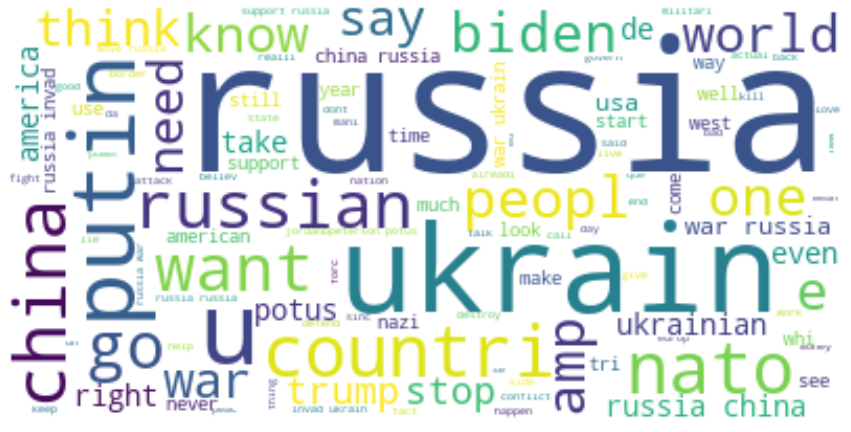

In [12]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now. we will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets:

In [13]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                               tweet  Positive  Negative  \
0  this week  year sinc russia fullscal invas ukr...     0.171     0.067   
1  generallmao ashtarakcii dikranterzian hovikyer...     0.000     0.263   
2  reuter car maker realli stop nonsens focus dev...     0.094     0.094   
3  reshetz wake air raid siren today programm rad...     0.112     0.435   
4  vladimir putin address feder assembl russia fe...     0.000     0.135   

   Neutral  
0    0.762  
1    0.737  
2    0.812  
3    0.454  
4    0.865  


Let's have look at the most frequent words used by people with positive sentiments:

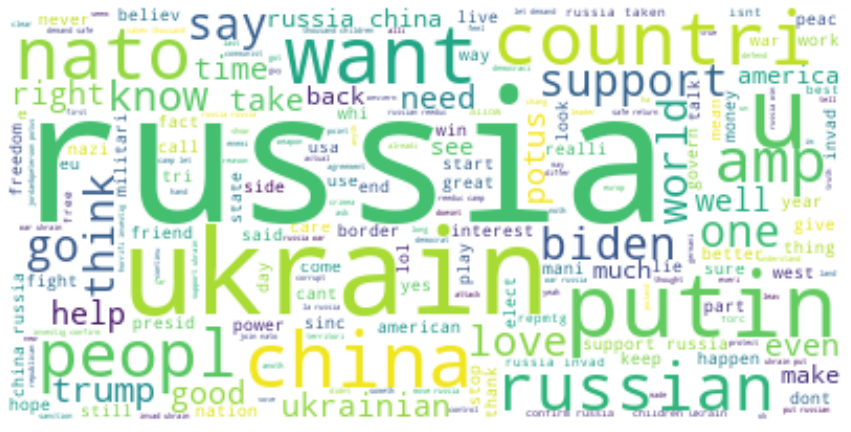

In [14]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let's have look at the most frequent words used by people with negative sentiments:

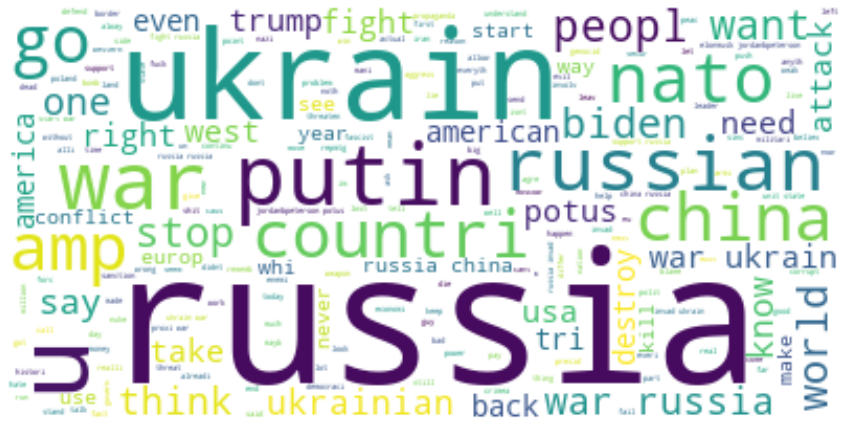

In [15]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()